In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# plot the scores
def plot_scores_for_text(keys, values, title, labels, colors=['darkslategray', 'teal', 'darkturquoise']):
    
    X_axis = np.arange(len(keys))
  
    for idx, val in enumerate(values):
        plt.bar(X_axis+((idx-1)*0.2), val, label=labels[idx], color=colors[idx], width=0.2)
    
    plt.xticks(X_axis, keys)
    plt.title(title)
    plt.ylabel('Number of answer phrases')
    plt.xlabel('Context text id')
    plt.legend()
    plt.show()

In [44]:
def read_eval_results(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    
    data = {}
    scores = []
    current_id = 0
    # Strips the newline character
    for item in lines:
        item = item.strip()
        if 'id' in item:
            text_id = item.split(':')[1]
            data[text_id] = []
            current_id = text_id
        else:
            data[current_id].append(int(item))
            scores.append(int(item))
    return data, scores

In [45]:
def get_score_stats(scores):
    print('Number of items: ', len(scores))
    score_count = {0:0, 1:0, 2:0}
    for val in scores:
        score_count[val] += 1
    total = score_count[0] + score_count[1] + score_count[2]
    print('Num 0s: ', score_count[0])
    print('Num 1s: ', score_count[1])
    print('Num 2s: ', score_count[2])
    print('disagreement: ', score_count[1]/total)
    print('Positive ', score_count[2]/total)
    print('Negative: ', (score_count[0]+score_count[1])/total)
    return score_count

def get_eval_stats(data, scores):
    text_stats = {}
    print('TOTAL STATS: ')
    all_scores = get_score_stats(scores)
    for id, text_scores in data.items():
        print('text {} scores'.format(id))
        score_count = get_score_stats(text_scores)
        text_stats[id] = score_count
    return text_stats, all_scores
        
        




In [46]:
def avg_num_accepted(stats):
    all_accepted = []
    for val in stats.values():
        all_accepted.append(val[2])
    print('average number of accepted: {}'.format(sum(all_accepted) / len(all_accepted)))
    


In [47]:
# read the CA results
CA_path = './data/CA_grammaticality.txt'
CA_data, CA_scores = read_eval_results(CA_path)
total_items = len(CA_scores)
CA_stats, all_CA_stats = get_eval_stats(CA_data, CA_scores)
avg_num_accepted(CA_stats)


TOTAL STATS: 
Number of items:  612
Num 0s:  248
Num 1s:  95
Num 2s:  269
disagreement:  0.15522875816993464
Positive  0.4395424836601307
Negative:  0.5604575163398693
text 1 scores
Number of items:  62
Num 0s:  30
Num 1s:  6
Num 2s:  26
disagreement:  0.0967741935483871
Positive  0.41935483870967744
Negative:  0.5806451612903226
text 2 scores
Number of items:  51
Num 0s:  20
Num 1s:  7
Num 2s:  24
disagreement:  0.13725490196078433
Positive  0.47058823529411764
Negative:  0.5294117647058824
text 3 scores
Number of items:  30
Num 0s:  11
Num 1s:  11
Num 2s:  8
disagreement:  0.36666666666666664
Positive  0.26666666666666666
Negative:  0.7333333333333333
text 6 scores
Number of items:  81
Num 0s:  32
Num 1s:  22
Num 2s:  27
disagreement:  0.2716049382716049
Positive  0.3333333333333333
Negative:  0.6666666666666666
text 11 scores
Number of items:  84
Num 0s:  33
Num 1s:  6
Num 2s:  45
disagreement:  0.07142857142857142
Positive  0.5357142857142857
Negative:  0.4642857142857143
text 13 s

In [17]:
CA_ev_1_path = './data/CA_ev1_gram.txt'
print('Evaluator 1 CA scores')
CA_ev1_data, CA_ev1_scores = read_eval_results(CA_ev_1_path)
CA_ev1_stats, all_CA_ev1_stats = get_eval_stats(CA_ev1_data, CA_ev1_scores)

Evaluator 1 CA scores
TOTAL STATS: 
Number of items:  612
Num 0s:  260
Num 1s:  352
Num 2s:  0
disagreement:  0.5751633986928104
Positive  0.0
Negative:  1.0
text 1 scores
Number of items:  62
Num 0s:  32
Num 1s:  30
Num 2s:  0
disagreement:  0.4838709677419355
Positive  0.0
Negative:  1.0
text 2 scores
Number of items:  51
Num 0s:  20
Num 1s:  31
Num 2s:  0
disagreement:  0.6078431372549019
Positive  0.0
Negative:  1.0
text 3 scores
Number of items:  30
Num 0s:  11
Num 1s:  19
Num 2s:  0
disagreement:  0.6333333333333333
Positive  0.0
Negative:  1.0
text 6 scores
Number of items:  81
Num 0s:  34
Num 1s:  47
Num 2s:  0
disagreement:  0.5802469135802469
Positive  0.0
Negative:  1.0
text 11 scores
Number of items:  84
Num 0s:  36
Num 1s:  48
Num 2s:  0
disagreement:  0.5714285714285714
Positive  0.0
Negative:  1.0
text 13 scores
Number of items:  57
Num 0s:  21
Num 1s:  36
Num 2s:  0
disagreement:  0.631578947368421
Positive  0.0
Negative:  1.0
text 17 scores
Number of items:  66
Num 0s:

In [18]:
CA_ev_2_path = './data/CA_ev2_gram.txt'
print('Evaluator 2 CA scores')
CA_ev2_data, CA_ev2_scores = read_eval_results(CA_ev_2_path)
CA_ev2_stats, all_CA_ev2_stats = get_eval_stats(CA_ev2_data, CA_ev2_scores)

Evaluator 2 CA scores
TOTAL STATS: 
Number of items:  612
Num 0s:  331
Num 1s:  281
Num 2s:  0
disagreement:  0.4591503267973856
Positive  0.0
Negative:  1.0
text 1 scores
Number of items:  62
Num 0s:  34
Num 1s:  28
Num 2s:  0
disagreement:  0.45161290322580644
Positive  0.0
Negative:  1.0
text 2 scores
Number of items:  51
Num 0s:  27
Num 1s:  24
Num 2s:  0
disagreement:  0.47058823529411764
Positive  0.0
Negative:  1.0
text 3 scores
Number of items:  30
Num 0s:  22
Num 1s:  8
Num 2s:  0
disagreement:  0.26666666666666666
Positive  0.0
Negative:  1.0
text 6 scores
Number of items:  81
Num 0s:  52
Num 1s:  29
Num 2s:  0
disagreement:  0.35802469135802467
Positive  0.0
Negative:  1.0
text 11 scores
Number of items:  84
Num 0s:  36
Num 1s:  48
Num 2s:  0
disagreement:  0.5714285714285714
Positive  0.0
Negative:  1.0
text 13 scores
Number of items:  57
Num 0s:  29
Num 1s:  28
Num 2s:  0
disagreement:  0.49122807017543857
Positive  0.0
Negative:  1.0
text 17 scores
Number of items:  66
Nu

In [29]:
# compute Cohen's kappa
def compute_cohens_kappa(all_stats, stats_ev1, stats_ev2):
    total_items = stats_ev1[0]+stats_ev1[1]
    p_o = 1 - all_stats[1]/total_items
    p_e = stats_ev1[0]/total_items * stats_ev2[0]/total_items + stats_ev1[1]/total_items * stats_ev2[1]/total_items 
    print('p_o: ', p_o)
    print('p_e: ', p_e)
    k = 1 - (1-p_o)/(1-p_e)
    print('kappa: ', k)

In [31]:
compute_cohens_kappa(all_CA_stats, all_CA_ev1_stats, all_CA_ev2_stats)

p_o:  0.8447712418300654
p_e:  0.4938591994532018
kappa:  0.6933091384803662


In [33]:
for key in CA_ev1_stats.keys():
    print('text id: ', key)
    print(CA_ev1_stats[key])
    compute_cohens_kappa(CA_stats[key], CA_ev1_stats[key], CA_ev2_stats[key])


text id:  1
{0: 32, 1: 30, 2: 0}
p_o:  0.9032258064516129
p_e:  0.5015608740894901
kappa:  0.8058455114822547
text id:  2
{0: 20, 1: 31, 2: 0}
p_o:  0.8627450980392157
p_e:  0.4936562860438293
kappa:  0.7289293849658316
text id:  3
{0: 11, 1: 19, 2: 0}
p_o:  0.6333333333333333
p_e:  0.4377777777777778
kappa:  0.3478260869565216
text id:  6
{0: 34, 1: 47, 2: 0}
p_o:  0.7283950617283951
p_e:  0.47721383935375705
kappa:  0.48046647230320705
text id:  11
{0: 36, 1: 48, 2: 0}
p_o:  0.9285714285714286
p_e:  0.510204081632653
kappa:  0.8541666666666667
text id:  13
{0: 21, 1: 36, 2: 0}
p_o:  0.7894736842105263
p_e:  0.49769159741458907
kappa:  0.5808823529411766
text id:  17
{0: 29, 1: 37, 2: 0}
p_o:  0.9242424242424242
p_e:  0.5055096418732782
kappa:  0.8467966573816155
text id:  20
{0: 26, 1: 30, 2: 0}
p_o:  0.8928571428571429
p_e:  0.49744897959183676
kappa:  0.7868020304568528
text id:  26
{0: 40, 1: 43, 2: 0}
p_o:  0.891566265060241
p_e:  0.4967339236463928
kappa:  0.7845399480819152
tex

In [55]:
def plot_text_stats(CA_stats, title):
    values_0 = [val[0] for val in list(CA_stats.values())]
    values_1 = [val[1] for val in list(CA_stats.values())]
    values_2 = [val[2] for val in list(CA_stats.values())]
    sum = [val[0]+val[1]+val[2] for val in list(CA_stats.values())]
    frac_val_0 = []
    frac_val_1 = []
    frac_val_2 = []
    for i in range(len(sum)):
        frac_val_0.append(values_0[i]/sum[i])
        frac_val_1.append(values_1[i]/sum[i])
        frac_val_2.append(values_2[i]/sum[i])

    labels = ['0', 'Disagreement', '1']
    keys = list(CA_stats.keys())
    values = [values_0, values_1, values_2]
    frac_values = [frac_val_0, frac_val_1, frac_val_2]
    print('keys: ', keys)
    print('values: ', values)
    plot_scores_for_text(keys, values, title, labels)
    plot_scores_for_text(keys, frac_values, title + ' as fractions', labels)

In [48]:
# read the RC results
RC_path = './data/RC_grammaticality.txt'
RC_data, RC_scores = read_eval_results(RC_path)
RC_stats, all_RC_stats = get_eval_stats(RC_data, RC_scores)
avg_num_accepted(RC_stats)

TOTAL STATS: 
Number of items:  145
Num 0s:  61
Num 1s:  15
Num 2s:  69
disagreement:  0.10344827586206896
Positive  0.47586206896551725
Negative:  0.5241379310344828
text 1 scores
Number of items:  20
Num 0s:  7
Num 1s:  1
Num 2s:  12
disagreement:  0.05
Positive  0.6
Negative:  0.4
text 2 scores
Number of items:  7
Num 0s:  3
Num 1s:  1
Num 2s:  3
disagreement:  0.14285714285714285
Positive  0.42857142857142855
Negative:  0.5714285714285714
text 3 scores
Number of items:  7
Num 0s:  4
Num 1s:  0
Num 2s:  3
disagreement:  0.0
Positive  0.42857142857142855
Negative:  0.5714285714285714
text 6 scores
Number of items:  2
Num 0s:  1
Num 1s:  1
Num 2s:  0
disagreement:  0.5
Positive  0.0
Negative:  1.0
text 11 scores
Number of items:  18
Num 0s:  9
Num 1s:  4
Num 2s:  5
disagreement:  0.2222222222222222
Positive  0.2777777777777778
Negative:  0.7222222222222222
text 13 scores
Number of items:  10
Num 0s:  3
Num 1s:  1
Num 2s:  6
disagreement:  0.1
Positive  0.6
Negative:  0.4
text 17 score

In [38]:
RC_ev1_path = './data/RC_ev1_gram.txt'
RC_ev1_data, RC_ev1_scores = read_eval_results(RC_ev1_path)
RC_ev1_stats, all_RC_ev1_stats = get_eval_stats(RC_ev1_data, RC_ev1_scores)

TOTAL STATS: 
Number of items:  145
Num 0s:  69
Num 1s:  76
Num 2s:  0
disagreement:  0.5241379310344828
Positive  0.0
Negative:  1.0
text 1 scores
Number of items:  20
Num 0s:  7
Num 1s:  13
Num 2s:  0
disagreement:  0.65
Positive  0.0
Negative:  1.0
text 2 scores
Number of items:  7
Num 0s:  3
Num 1s:  4
Num 2s:  0
disagreement:  0.5714285714285714
Positive  0.0
Negative:  1.0
text 3 scores
Number of items:  7
Num 0s:  4
Num 1s:  3
Num 2s:  0
disagreement:  0.42857142857142855
Positive  0.0
Negative:  1.0
text 6 scores
Number of items:  2
Num 0s:  1
Num 1s:  1
Num 2s:  0
disagreement:  0.5
Positive  0.0
Negative:  1.0
text 11 scores
Number of items:  18
Num 0s:  13
Num 1s:  5
Num 2s:  0
disagreement:  0.2777777777777778
Positive  0.0
Negative:  1.0
text 13 scores
Number of items:  10
Num 0s:  4
Num 1s:  6
Num 2s:  0
disagreement:  0.6
Positive  0.0
Negative:  1.0
text 17 scores
Number of items:  21
Num 0s:  10
Num 1s:  11
Num 2s:  0
disagreement:  0.5238095238095238
Positive  0.0
Neg

In [39]:
RC_ev2_path = './data/RC_ev2_gram.txt'
RC_ev2_data, RC_ev2_scores = read_eval_results(RC_ev2_path)
RC_ev2_stats, all_RC_ev2_stats = get_eval_stats(RC_ev2_data, RC_ev2_scores)

TOTAL STATS: 
Number of items:  145
Num 0s:  68
Num 1s:  77
Num 2s:  0
disagreement:  0.5310344827586206
Positive  0.0
Negative:  1.0
text 1 scores
Number of items:  20
Num 0s:  8
Num 1s:  12
Num 2s:  0
disagreement:  0.6
Positive  0.0
Negative:  1.0
text 2 scores
Number of items:  7
Num 0s:  4
Num 1s:  3
Num 2s:  0
disagreement:  0.42857142857142855
Positive  0.0
Negative:  1.0
text 3 scores
Number of items:  7
Num 0s:  4
Num 1s:  3
Num 2s:  0
disagreement:  0.42857142857142855
Positive  0.0
Negative:  1.0
text 6 scores
Number of items:  2
Num 0s:  2
Num 1s:  0
Num 2s:  0
disagreement:  0.0
Positive  0.0
Negative:  1.0
text 11 scores
Number of items:  18
Num 0s:  9
Num 1s:  9
Num 2s:  0
disagreement:  0.5
Positive  0.0
Negative:  1.0
text 13 scores
Number of items:  10
Num 0s:  3
Num 1s:  7
Num 2s:  0
disagreement:  0.7
Positive  0.0
Negative:  1.0
text 17 scores
Number of items:  21
Num 0s:  9
Num 1s:  12
Num 2s:  0
disagreement:  0.5714285714285714
Positive  0.0
Negative:  1.0
text 

In [40]:
compute_cohens_kappa(all_RC_stats, all_RC_ev1_stats, all_RC_ev2_stats)

p_o:  0.896551724137931
p_e:  0.5014982164090369
kappa:  0.7924816334319245


In [41]:
for key in RC_ev1_stats.keys():
    print('text id: ', key)
    print(RC_ev1_stats[key])
    compute_cohens_kappa(RC_stats[key], RC_ev1_stats[key], RC_ev2_stats[key])

text id:  1
{0: 7, 1: 13, 2: 0}
p_o:  0.95
p_e:  0.53
kappa:  0.8936170212765957
text id:  2
{0: 3, 1: 4, 2: 0}
p_o:  0.8571428571428572
p_e:  0.4897959183673469
kappa:  0.7200000000000002
text id:  3
{0: 4, 1: 3, 2: 0}
p_o:  1.0
p_e:  0.510204081632653
kappa:  1.0
text id:  6
{0: 1, 1: 1, 2: 0}
p_o:  0.5
p_e:  0.5
kappa:  0.0
text id:  11
{0: 13, 1: 5, 2: 0}
p_o:  0.7777777777777778
p_e:  0.5
kappa:  0.5555555555555556
text id:  13
{0: 4, 1: 6, 2: 0}
p_o:  0.9
p_e:  0.54
kappa:  0.782608695652174
text id:  17
{0: 10, 1: 11, 2: 0}
p_o:  0.9523809523809523
p_e:  0.5034013605442178
kappa:  0.9041095890410957
text id:  20
{0: 9, 1: 10, 2: 0}
p_o:  0.8947368421052632
p_e:  0.5013850415512464
kappa:  0.788888888888889
text id:  26
{0: 16, 1: 16, 2: 0}
p_o:  0.9375
p_e:  0.5
kappa:  0.875
text id:  40
{0: 2, 1: 7, 2: 0}
p_o:  0.7777777777777778
p_e:  0.5308641975308641
kappa:  0.5263157894736843


keys:  ['1', '2', '3', '6', '11', '13', '17', '20', '26', '40']
values:  [[30, 20, 11, 32, 33, 19, 27, 25, 40, 11], [6, 7, 11, 22, 6, 12, 5, 6, 9, 11], [26, 24, 8, 27, 45, 26, 34, 25, 34, 20]]


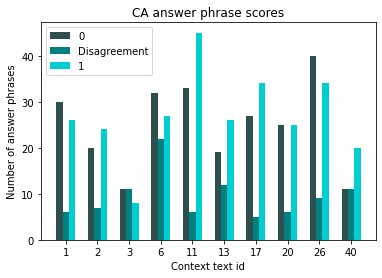

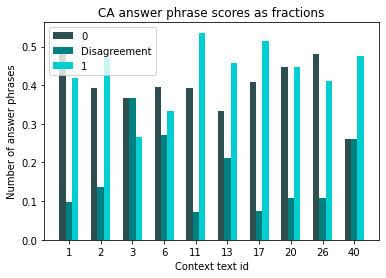

keys:  ['1', '2', '3', '6', '11', '13', '17', '20', '26', '40']
values:  [[7, 3, 4, 1, 9, 3, 9, 8, 15, 2], [1, 1, 0, 1, 4, 1, 1, 2, 2, 2], [12, 3, 3, 0, 5, 6, 11, 9, 15, 5]]


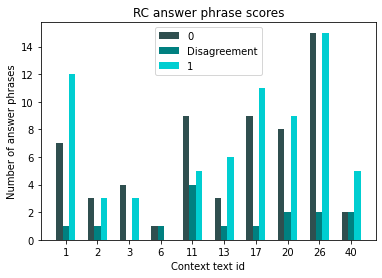

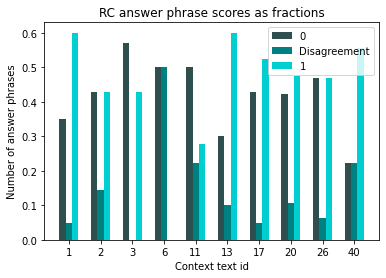

In [57]:
plot_text_stats(CA_stats, 'CA answer phrase scores')
plot_text_stats(RC_stats, 'RC answer phrase scores')

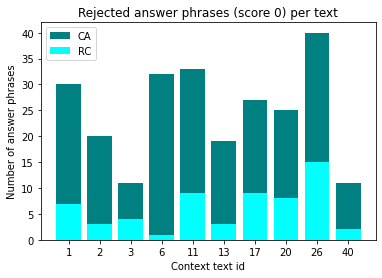

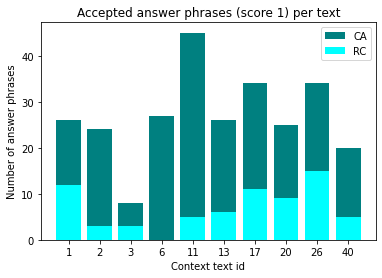

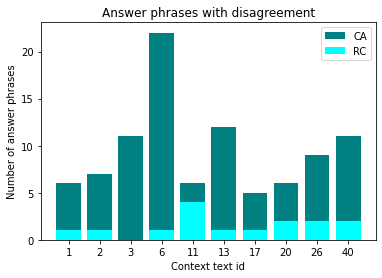

In [58]:
# plot the scores
def plot_scores(CA_keys, CA_values, RC_keys, RC_values, title):
    plt.bar(CA_keys, CA_values, color='teal', label='CA')
    plt.bar(RC_keys, RC_values, color='cyan', label='RC')
    plt.title(title)
    plt.ylabel('Number of answer phrases')
    plt.xlabel('Context text id')
    plt.legend()
    plt.show()

ca_z = []
ca_o = []
ca_t = []
rc_z = []
rc_o = []
rc_t = []
for key, val in CA_stats.items():
    ca_z.append(val[0])
    rc_z.append(RC_stats[key][0])
    ca_o.append(val[1])
    rc_o.append(RC_stats[key][1])
    ca_t.append(val[2])
    rc_t.append(RC_stats[key][2])

plot_scores(CA_stats.keys(), ca_z, RC_stats.keys(), rc_z, 'Rejected answer phrases (score 0) per text')
plot_scores(CA_stats.keys(), ca_t, RC_stats.keys(), rc_t, 'Accepted answer phrases (score 1) per text')
plot_scores(CA_stats.keys(), ca_o, RC_stats.keys(), rc_o, 'Answer phrases with disagreement')